In [1]:
import matplotlib.pyplot as plt
import sys
import pandas as pd

sys.path.append("..")
from utils import conf
from library.cleaner import clear

plt.style.use("ggplot")

# Data

In [2]:
df = pd.read_csv(conf.raw_data_file)

In [3]:
df.tail()

,msg_id,msg,label,subset
6537,6537,#продажа – 5 спальная вилла лимасол (кипр)/ к...,0,test
6538,6538,"[anastasia kikel](tg://user?id=930668254), you...",0,test
6539,6539,аренда/пафос pano paphos совершенно новые 3 ...,0,test
6540,6540,"здравствуйте , дорогие друзья ! ищу бизнес для...",0,test
6541,6541,ищем квартиру в пафосе в аренду с середины авг...,0,test


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6542 entries, 0 to 6541
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   msg_id  6542 non-null   int64 
 1   msg     6542 non-null   object
 2   label   6542 non-null   int64 
 3   subset  6542 non-null   object
dtypes: int64(2), object(2)
memory usage: 204.6+ KB


## Data cleanup

In [5]:
df["cleared_msg"] = clear(df.msg)

## Analysis of msgs

In [6]:
get_msg_len = lambda msg: len(str(msg).split())
df["msg_len"] = df.msg.apply(get_msg_len)
df["cleared_msg_len"] = df.cleared_msg.apply(get_msg_len)
df[["msg_len", "cleared_msg_len"]].describe()

,msg_len,cleared_msg_len
count,6542.000000,6542.000000
mean,49.136350,43.692449
std,41.917057,38.923363
min,1.000000,0.000000
25%,16.000000,16.000000
50%,37.000000,36.000000
75%,78.000000,61.000000
max,433.000000,425.000000


In [7]:
df.loc[df["cleared_msg_len"] == 0, ["label", "msg"]]

,label,msg
222,1,https://www.bazaraki.com/adv/4267812_2-bedroom...
359,0,https://t.me/avtocyprus
481,0,υπάρχει ένα κορίτσι για γάμο
570,0,https://www.news.cyprus-property-buyers.com/20...
600,0,γεια σας όμορφοι άνθρωποι
623,0,https://t.me/salecyprus1000/1433
731,0,https://m.facebook.com/groups/www.delfipropert...
1294,0,έχω μια επαγγελματική πρόταση και είναι επείγουσα
1563,0,is.gd/jtvdzt
2312,0,https://www.bazaraki.com/adv/4063062_2-bedroom...


In [8]:
def plot(df: pd.DataFrame, title: str):
    def plot_labels_bar(ax, subset_name: str):
        df.loc[df.subset == subset_name, "label"].value_counts().plot.bar(ax=ax)
        ax.set_title(subset_name)
        ax.set_xlabel("label")
        ax.set_ylabel("count")

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    plot_labels_bar(ax1, "train")
    plot_labels_bar(ax2, "test")
    plt.suptitle(title)
    plt.show(fig)

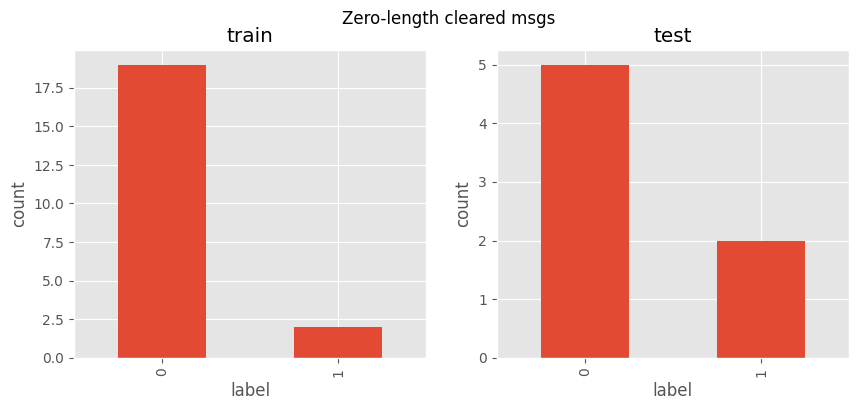

In [9]:
plot(df.loc[df["cleared_msg_len"] == 0], "Zero-length cleared msgs")

## Remove zero-length cleared msgs

In [10]:
df = df.loc[df["cleared_msg_len"] != 0].reset_index(drop=True)

In [11]:
df[["msg_len", "cleared_msg_len"]].describe()

,msg_len,cleared_msg_len
count,6514.000000,6514.000000
mean,49.339576,43.880258
std,41.891873,38.901144
min,1.000000,1.000000
25%,16.000000,16.000000
50%,37.000000,36.000000
75%,78.000000,61.000000
max,433.000000,425.000000


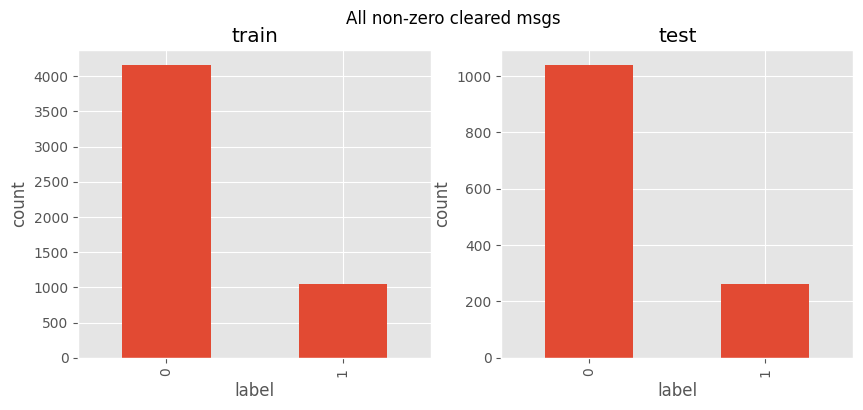

In [12]:
plot(df, "All non-zero cleared msgs")